<a href="https://colab.research.google.com/github/PavelMakhanov/pet-project/blob/main/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%BF%D1%80%D0%B5%D0%B4%D0%B8%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Архивный датасет ЯндексНедвижимости.

**Цель:**
Обучить модель предсказывать цену на недвижимость в Санкт-Петербурге 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [4]:
estate = pd.read_csv('real_estate_data.csv')

In [5]:
pd.set_option('max_columns', None)

In [6]:
estate.head()

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

**Удалим ненужные колонки, которые не будут использоваться при обучении модели**

Unnamed: 0 - данная колонка показывает все-лишь порядок строк

In [8]:
estate = estate.drop('Unnamed: 0', axis = 1)

total_images - это количество изображений в объявлении, оно влияет на скорость продажи недвижимости, но данный показатель уже у нас есть в виде признака days_exposition       

In [9]:
estate = estate.drop('total_images', axis = 1)

parks_around3000','ponds_around3000 являются отображением количества парков колонок parks_nearest и ponds_nearest, поэтому удалим их тоже

In [10]:
estate = estate.drop(['parks_around3000','ponds_around3000'], axis = 1)

Так же оставим в датасете только интересующий нас город Санкт-Петербург

In [11]:
estate = estate.loc[estate['locality_name'] == 'Санкт-Петербург']

Преобразуем колонку first_day_exposition в datetime и создадим новые колонки с месяцем и годом, а исходную удалим

In [12]:
estate['first_day_exposition']= pd.to_datetime(estate['first_day_exposition'])

In [13]:
estate['month_exposition'] = estate['first_day_exposition'].dt.month

In [14]:
estate['year_exposition'] = estate['first_day_exposition'].dt.year

In [15]:
estate = estate.drop(['first_day_exposition'], axis = 1)

In [16]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           15721 non-null  float64
 1   total_area           15721 non-null  float64
 2   rooms                15721 non-null  int64  
 3   ceiling_height       10104 non-null  float64
 4   floors_total         15651 non-null  float64
 5   living_area          14581 non-null  float64
 6   floor                15721 non-null  int64  
 7   is_apartment         1833 non-null   object 
 8   studio               15721 non-null  bool   
 9   open_plan            15721 non-null  bool   
 10  kitchen_area         14342 non-null  float64
 11  balcony              8009 non-null   float64
 12  locality_name        15721 non-null  object 
 13  airports_nearest     15636 non-null  float64
 14  cityCenters_nearest  15660 non-null  float64
 15  parks_nearest        7284 non-null  

**Посмотрим основные статистики**

In [17]:
estate.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,month_exposition,year_exposition
count,1.572100e+04,15721.000000,15721.000000,10104.000000,15651.000000,14581.000000,15721.000000,14342.000000,8009.000000,15636.000000,15660.000000,7284.000000,7983.000000,13638.000000,15721.000000,15721.000000
mean,8.062507e+06,64.751488,2.171618,2.803709,11.395885,36.959148,6.242033,11.155806,1.141965,28046.186237,11601.291571,498.597886,520.213955,182.792198,6.421983,2017.351886
std,1.301313e+07,40.417095,1.148098,1.296912,6.372330,24.701374,4.900486,6.543392,1.093276,11557.063820,4842.035279,345.181284,280.260745,224.719204,3.465502,1.057608
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,1.000000,13.000000,1.000000,1.000000,2014.000000
25%,4.200000e+06,42.000000,1.000000,2.550000,5.000000,19.900000,3.000000,7.200000,0.000000,18584.250000,8327.000000,295.000000,293.000000,42.000000,3.000000,2017.000000
50%,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,9.900000,1.000000,26757.500000,12244.500000,460.000000,503.000000,95.000000,6.000000,2017.000000
75%,8.160000e+06,74.600000,3.000000,2.870000,16.000000,44.000000,8.000000,12.500000,2.000000,36614.000000,14943.000000,619.000000,738.000000,231.000000,10.000000,2018.000000
max,7.630000e+08,900.000000,19.000000,100.000000,52.000000,409.700000,33.000000,112.000000,5.000000,54784.000000,29493.000000,3190.000000,1337.000000,1572.000000,12.000000,2019.000000


**Поищем выбросы в данных и сразу заполним пропуски**

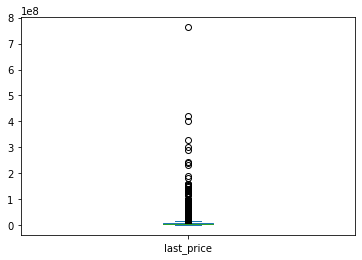

In [18]:
estate['last_price'].plot(kind='box')

Видим один объект, очень похожий на выброс, теоритически он может столько стоить, например из-за исторической ценности, но в данном случае нет возможности его проверить, поэтому удалим, считая его выбросом. Пропусков нет

In [19]:
estate = estate.loc[estate['last_price']<7.6e+08]

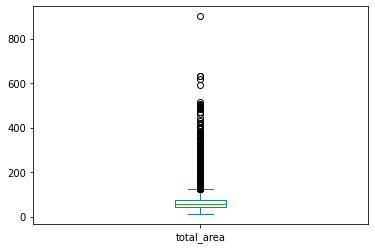

In [20]:
estate['total_area'].plot(kind='box')

Похоже есть еще один объект похожий на выброс, так как он сильно отличается от всех остальных, теоритически это это может быть очень большой жилой дом, но всякий случай удалим этот объект. Пропусков нет  

In [21]:
estate = estate.loc[estate['total_area']<800]

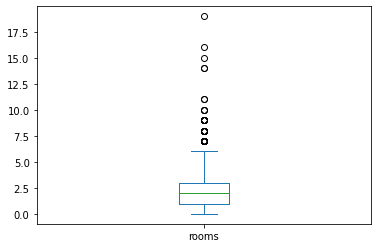

In [22]:
estate['rooms'].plot(kind='box')

Максимальное количество комнат 19, в частном доме вполне вероятно , поэтому будем считать, что выбросов нет. Пропусков нет

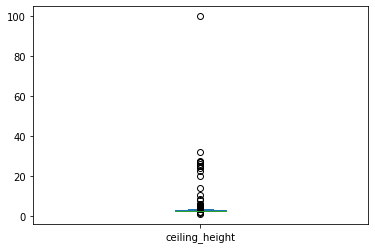

In [23]:
estate['ceiling_height'].plot(kind='box')

Судя по графику очень много неточных данных, высота потолков никак не может быть меньше 2.5 м и больше 3.4 м, поэтому напишем функцию и заменим значения. Если ниже 2.5м заменим на 2.5 если больше 3.4м то заменим на 75% квантиль 

In [24]:
q = estate['ceiling_height'].quantile(0.75)

In [25]:
def repl(x):
  if x > 3.4:
    x = q
  elif x < 2.5:
    x = 2.5 
  return x  

In [26]:
estate['ceiling_height'] = estate['ceiling_height'].apply(repl) 

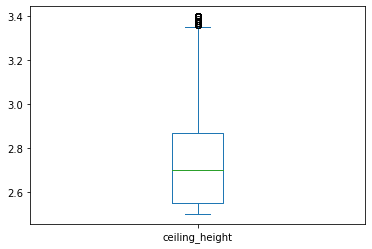

In [27]:
estate['ceiling_height'].plot(kind='box')

Так же в признаке много пустых значений, заменим их на медиану

In [28]:
estate['ceiling_height'] = estate['ceiling_height'].fillna(estate['ceiling_height'].median())

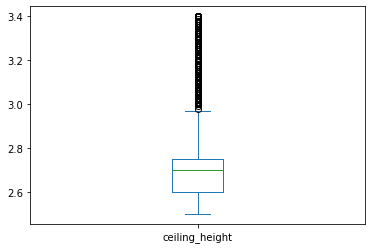

In [29]:
estate['ceiling_height'].plot(kind='box')

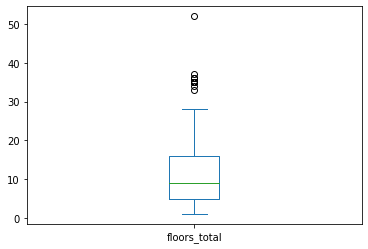

In [30]:
estate['floors_total'].plot(kind='box')

Высота в 52 этажа вполне реальна, поэтому будем считать, что выбросов нет.

Так как в признаке floor у нас пропусков нет , то будем считать что в отсутствующих значениях floors_total ровняется floor 

In [31]:
estate.loc[estate['floors_total'].isna(),'floors_total'] = estate['floor']

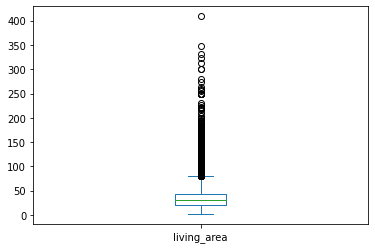

In [32]:
estate['living_area'].plot(kind='box')

Жилая площадь в 400 кв.м. вполне может быть, поэтому не будем считать большую площадь выбросами, но на всякий случай сравним с общей площадью

In [33]:
estate[estate['living_area']>300]

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,month_exposition,year_exposition
660,49950000.0,483.9,7,3.20,6.0,312.5,4,NaN,False,False,26.4,NaN,Санкт-Петербург,23079.0,945.0,461.0,22.0,391.0,10,2017
4237,50000000.0,517.0,7,2.70,4.0,332.0,3,NaN,False,False,22.0,NaN,Санкт-Петербург,22835.0,1847.0,477.0,540.0,NaN,10,2017
5358,65000000.0,590.0,15,2.87,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,767.0,NaN,14.0,2,2019
8018,84000000.0,507.0,5,2.87,7.0,301.5,7,True,False,False,45.5,1.0,Санкт-Петербург,NaN,5735.0,110.0,NaN,1078.0,12,2015
12401,91500000.0,495.0,7,2.87,7.0,347.5,7,NaN,False,False,25.0,0.0,Санкт-Петербург,NaN,5735.0,110.0,NaN,14.0,6,2017
12859,140000000.0,631.2,7,2.87,4.0,322.3,4,NaN,False,False,19.5,1.0,Санкт-Петербург,25707.0,4972.0,NaN,210.0,NaN,4,2019


С минимальным значением не понятно , минимальный размер комнаты в общежитиии 6 кв.м. посмотрим, какие объекты меньше этого значения

In [34]:
estate[estate['living_area']<6]

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,month_exposition,year_exposition
3242,4440000.0,41.0,1,2.7,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0,NaN,NaN,216.0,7,2017
13915,6350000.0,52.0,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0,NaN,1012.0,91.0,2,2018
17582,2680000.0,22.0,0,2.7,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0,835.0,652.0,70.0,8,2018
21943,6100000.0,77.6,4,2.5,9.0,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0,584.0,NaN,33.0,2,2019
23574,64990000.0,139.0,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0,630.0,100.0,280.0,11,2015


Можно предположить, что просто неверно поставили точку в цифре , но так как объектов мало , лучше их просто удалить

In [35]:
estate = estate[estate['living_area']>6]

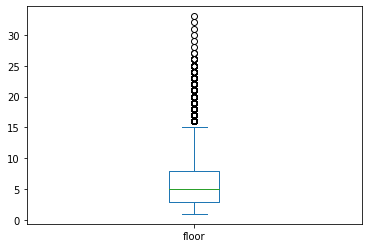

In [36]:
estate['floor'].plot(kind='box')

В данном признаке выбросов и пропусков нет

In [37]:
estate['is_apartment'].value_counts()

False    1736
True       33
Name: is_apartment, dtype: int64

Здесь вполне вероятно, что отсутствующие значения означают отрицание, поэтому заменим их на False

In [38]:
estate.loc[estate['is_apartment'].isna(),'is_apartment'] = False

In [39]:
estate['is_apartment'].value_counts()

False    14540
True        33
Name: is_apartment, dtype: int64

И сразу сделаем бинарное кодирование данного признака для обучения модели и то же самое сделаем со следующими двумя, так как пропущенных значений нет

In [40]:
le = LabelEncoder()
estate['is_apartment'] = le.fit_transform(estate['is_apartment'])
estate['studio'] = le.fit_transform(estate['studio'])
estate['open_plan'] = le.fit_transform(estate['open_plan'])

In [41]:
estate['is_apartment'].value_counts()

0    14540
1       33
Name: is_apartment, dtype: int64

In [42]:
estate['studio'].value_counts()

0    14492
1       81
Name: studio, dtype: int64

In [43]:
estate['open_plan'].value_counts()

0    14544
1       29
Name: open_plan, dtype: int64

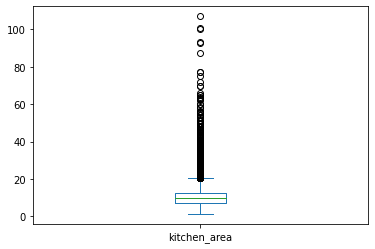

In [44]:
estate['kitchen_area'].plot(kind='box')

Довольно большая кухня с планировкой типа остров занимает 20 кв.м., но в то же время на рынке есть предложения объектов недвижимости с площадью кухни 35 кв.м. но их очень мало , а в нашем случае их достаточно большое количество. Считаю нужным преобразовать значения с площадью более 35 к значению 35 и заполним пропущенные значения медианой

In [45]:
estate.loc[estate['kitchen_area']>35,'kitchen_area'] = 35

In [46]:
estate['kitchen_area'] = estate['kitchen_area'].fillna(estate['kitchen_area'].median())

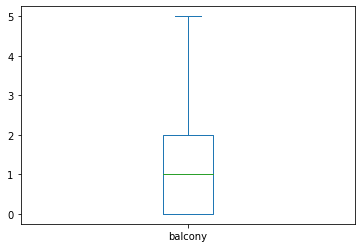

In [47]:
estate['balcony'].plot(kind='box')

5 балконов вполне может быть, например в частном доме, поэтому будем считать, что выбростов нет. Пропуски заполним нулями, так как скорее всего отсутствие данных о балконе говорит об отсутствии балкона

In [48]:
estate.loc[estate['balcony'].isna(),'balcony'] = 0

Следующий признак мы удалим, так как рассматриваем недвижимость только по Санкт-Петербургу, а другие объекты мы отсортировали ранее

In [49]:
estate = estate.drop('locality_name', axis = 1)

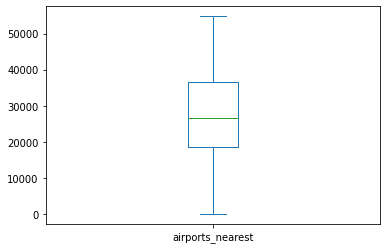

In [50]:
estate['airports_nearest'].plot(kind='box')

54 км до аэропорта, вполне реальная цифра, могут ли находиться объекты на территории аэропорта(расстояние до аэропорта = 0), я сомневаюсь , а так как такой объект один , лучше удалить. Пропуски заполним так же медианой

In [51]:
estate = estate[estate['airports_nearest']!=0]

In [52]:
estate['airports_nearest'] = estate['airports_nearest'].fillna(estate['airports_nearest'].median())

<ipython-input-52-27e2ea71311b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estate['airports_nearest'] = estate['airports_nearest'].fillna(estate['airports_nearest'].median())


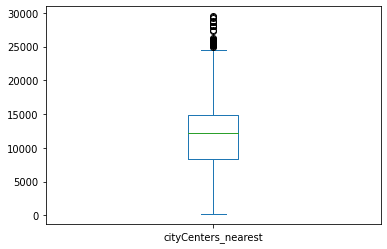

In [53]:
estate['cityCenters_nearest'].plot(kind='box')

В данном признаке выбросов нет, пропуски заполним медианой

In [54]:
estate['cityCenters_nearest'] = estate['cityCenters_nearest'].fillna(estate['cityCenters_nearest'].median())

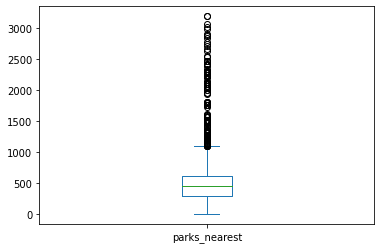

In [55]:
estate['parks_nearest'].plot(kind='box')

Выбросов в данном признаке нет, так как максимальное значение 3190, получается что парки которые были дальше этого расстояния не учитывались , поэтому заполним пропуски значеним 5000 на таком расстоянии парк в Санкт-Петербурге точно будет находиться

In [56]:
estate.loc[estate['parks_nearest'].isna(),'parks_nearest'] = 5000

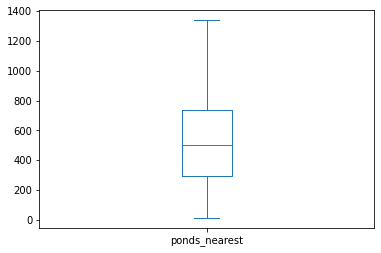

In [57]:
estate['ponds_nearest'].plot(kind='box')

Выбросов нет , по пропускам поступим аналогично как и с предыдущим признаком

In [58]:
estate.loc[estate['ponds_nearest'].isna(),'ponds_nearest'] = 5000

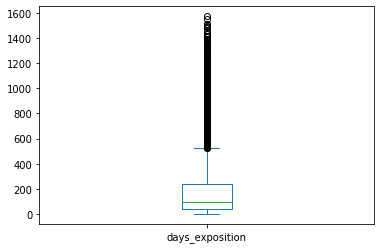

In [59]:
estate['days_exposition'].plot(kind='box')

Здесь тоже можно большие значения за выбросы не считать , вполне такое возможно, что квартира продается не один год. Промущенные значения заполним медианой

In [60]:
estate['days_exposition'] = estate['days_exposition'].fillna(estate['days_exposition'].median())

In [61]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14572 entries, 0 to 23694
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           14572 non-null  float64
 1   total_area           14572 non-null  float64
 2   rooms                14572 non-null  int64  
 3   ceiling_height       14572 non-null  float64
 4   floors_total         14572 non-null  float64
 5   living_area          14572 non-null  float64
 6   floor                14572 non-null  int64  
 7   is_apartment         14572 non-null  int64  
 8   studio               14572 non-null  int64  
 9   open_plan            14572 non-null  int64  
 10  kitchen_area         14572 non-null  float64
 11  balcony              14572 non-null  float64
 12  airports_nearest     14572 non-null  float64
 13  cityCenters_nearest  14572 non-null  float64
 14  parks_nearest        14572 non-null  float64
 15  ponds_nearest        14572 non-null 

In [62]:
estate.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,month_exposition,year_exposition
count,1.457200e+04,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000
mean,7.867627e+06,64.232448,2.174581,2.719502,11.336742,36.933670,6.228383,0.002265,0.005559,0.001990,10.890314,0.599712,28001.639789,11604.263794,2915.283626,2745.339212,173.506108,6.440640,2017.338251
std,1.081006e+07,38.371243,1.144968,0.178792,6.338779,24.442127,4.883517,0.047536,0.074351,0.044568,5.396792,0.969939,11560.631938,4807.836360,2257.985270,2248.085450,211.904037,3.449705,1.063096
min,1.219000e+04,12.000000,0.000000,2.500000,1.000000,6.500000,1.000000,0.000000,0.000000,0.000000,1.300000,0.000000,6450.000000,181.000000,1.000000,13.000000,1.000000,1.000000,2014.000000
25%,4.200000e+06,42.000000,1.000000,2.600000,5.000000,19.900000,3.000000,0.000000,0.000000,0.000000,7.300000,0.000000,18522.000000,8389.750000,482.000000,502.000000,47.000000,3.000000,2017.000000
50%,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.300000,5.000000,0.000000,0.000000,0.000000,9.800000,0.000000,26646.000000,12258.000000,5000.000000,1180.000000,99.000000,6.000000,2017.000000
75%,8.000000e+06,74.100000,3.000000,2.750000,16.000000,44.000000,8.000000,0.000000,0.000000,0.000000,12.200000,1.000000,36553.000000,14931.000000,5000.000000,5000.000000,203.000000,10.000000,2018.000000
max,4.013000e+08,631.200000,19.000000,3.400000,52.000000,409.000000,33.000000,1.000000,1.000000,1.000000,35.000000,5.000000,54784.000000,29493.000000,5000.000000,5000.000000,1572.000000,12.000000,2019.000000


**Приступим к обучению модели линейной регрессии**

Напишем функцию которая принимает на вход целевую переменную и признаки, а возвращает три метрики(accuracy, rmse, r2)

In [63]:
estate.columns

Index(['last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition'],
      dtype='object')

In [64]:
X = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [65]:
y = estate['last_price']

In [66]:
def score(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lr = LinearRegression()
  lr.fit(X_train,y_train)
  predict = lr.predict(X_test)
  print(f'Accuracy на тренировочной выборке: {lr.score(X_train, y_train)}\nAccuracy на тестовой выборке: {lr.score(X_test, y_test)}')
  print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
  print(f'R2:    {r2_score(y_test,predict)}')

In [67]:
score(X,y)

Accuracy на тренировочной выборке: 0.516789407985566
Accuracy на тестовой выборке: 0.5712966071392989
RMSE:  6255538.813517126
R2:    0.5712966071392989


Создадим матрицу корреляции и попробуем убрать поочередно коррелирующие между собой признаки

In [68]:
corr = estate.corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,month_exposition,year_exposition
last_price,1.000000,0.687901,0.399900,0.276219,-0.072640,0.610848,-0.013154,0.028926,-0.028780,-0.017228,0.473571,0.001726,-0.018399,-0.293589,-0.117604,-0.117250,0.091511,-0.009273,-0.046824
total_area,0.687901,1.000000,0.776161,0.367559,-0.116712,0.942107,-0.043414,0.022332,-0.066855,-0.038029,0.596698,-0.009030,-0.020202,-0.344081,-0.128556,-0.118492,0.142587,-0.002807,-0.090848
rooms,0.399900,0.776161,1.000000,0.242479,-0.265013,0.843929,-0.165576,-0.013569,-0.138776,-0.072710,0.289227,-0.039097,-0.053062,-0.294988,-0.110078,-0.061888,0.117482,-0.011832,-0.058892
ceiling_height,0.276219,0.367559,0.242479,1.000000,-0.106138,0.333093,-0.052556,0.043657,0.013115,0.005034,0.352464,-0.068576,-0.082703,-0.427245,-0.166269,-0.123270,0.110335,-0.004325,-0.085154
floors_total,-0.072640,-0.116712,-0.265013,-0.106138,1.000000,-0.207172,0.650268,-0.025535,0.061848,0.038683,0.137218,0.218887,0.109649,0.360418,0.220593,0.057199,-0.035880,0.003122,0.019037
living_area,0.610848,0.942107,0.843929,0.333093,-0.207172,1.000000,-0.110913,0.020321,-0.049722,-0.025886,0.430030,-0.031511,-0.045478,-0.353264,-0.137386,-0.102328,0.132280,-0.007508,-0.080361
floor,-0.013154,-0.043414,-0.165576,-0.052556,0.650268,-0.110913,1.000000,-0.009323,0.027312,0.037012,0.119335,0.199050,0.071045,0.231438,0.138784,0.026963,-0.027612,0.005669,0.013699
is_apartment,0.028926,0.022332,-0.013569,0.043657,-0.025535,0.020321,-0.009323,1.000000,-0.003562,-0.002127,0.024392,0.039013,0.014819,0.008860,0.001613,-0.015125,0.024005,0.000611,0.001138
studio,-0.028780,-0.066855,-0.138776,0.013115,0.061848,-0.049722,0.027312,-0.003562,1.000000,-0.003339,-0.015105,0.031807,-0.019674,0.017007,0.036197,-0.005517,-0.018487,0.008912,0.010073
open_plan,-0.017228,-0.038029,-0.072710,0.005034,0.038683,-0.025886,0.037012,-0.002127,-0.003339,1.000000,-0.009022,0.020017,-0.021695,0.006967,0.017154,-0.007704,-0.020011,0.030006,-0.017106


Очень сильная корреляция у living_area сразу с тремя признаками, попробуем убрать сначала его

In [69]:
X2 = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [70]:
score(X2,y)

Accuracy на тренировочной выборке: 0.5163433683495153
Accuracy на тестовой выборке: 0.5757108747985062
RMSE:  6223249.503038799
R2:    0.5757108747985062


Метрики хоть и немного, но улучшились. Попробуем убрать признак total_area

In [71]:
X3 = estate[['rooms', 'ceiling_height', 'floors_total',
       'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [72]:
score(X3,y)

Accuracy на тренировочной выборке: 0.30300736087211655
Accuracy на тестовой выборке: 0.41046703917053184
RMSE:  7335678.82501804
R2:    0.41046703917053184


Метрики заметно ухудшились, поэтому данный признак оставляем, попробуем убрать признак rooms

In [73]:
X4 = estate[['total_area','ceiling_height', 'floors_total',
       'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [74]:
score(X4,y)

Accuracy на тренировочной выборке: 0.46994427112133264
Accuracy на тестовой выборке: 0.5652037882181606
RMSE:  6299834.472525046
R2:    0.5652037882181606


Метрики хуже по сравнению с нашей лучшей метрикой, попробуем убрать total_area, а оставить living_area

In [75]:
X5 = estate[['rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [76]:
score(X5,y)

Accuracy на тренировочной выборке: 0.4476589986912888
Accuracy на тестовой выборке: 0.5742701667930175
RMSE:  6233806.3222508915
R2:    0.5742701667930175


Метрика немного похуже, чем наша лучшая метрика. Значит оставим признаки X2 и уберем следующий коррелирующий признак floors_total

In [77]:
X6 = estate[['total_area', 'rooms', 'ceiling_height',
       'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [78]:
score(X6,y)

Accuracy на тренировочной выборке: 0.5153991249339166
Accuracy на тестовой выборке: 0.5753555435588045
RMSE:  6225854.863444559
R2:    0.5753555435588045


Метрика немного хуже, попробуем убирать другие признаки, в попытке попысить скор

In [79]:
X7 = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'floor','studio', 'open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [80]:
score(X7,y)

Accuracy на тренировочной выборке: 0.516297799323909
Accuracy на тестовой выборке: 0.5761154202769677
RMSE:  6220281.965464394
R2:    0.5761154202769677


Убрав признак is_apartment мы повысили метрику, пробуем дальше

In [81]:
X8 = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total',
       'floor','open_plan',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [82]:
score(X8,y)

Accuracy на тренировочной выборке: 0.5161075616567425
Accuracy на тестовой выборке: 0.5762551326103444
RMSE:  6219256.778690975
R2:    0.5762551326103444


Убрав признак 'studio',  мы повысили метрику, пробуем дальше

In [83]:
X9 = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total','floor',
       'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [84]:
score(X9,y)

Accuracy на тренировочной выборке: 0.5160707528300883
Accuracy на тестовой выборке: 0.5762924944477659
RMSE:  6218982.594859324
R2:    0.5762924944477659


Убрав признак 'open_plan',  мы повысили метрику, пробуем дальше

In [85]:
X10 = estate[['total_area', 'rooms', 'ceiling_height', 'floors_total','floor',
       'kitchen_area','airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [86]:
score(X10,y)

Accuracy на тренировочной выборке: 0.5158227951146706
Accuracy на тестовой выборке: 0.5765727806981583
RMSE:  6216925.29866615
R2:    0.5765727806981583


Убрав признак 'balcony', мы повысили метрику, пробуем дальше

In [87]:
X11 = estate[['total_area', 'rooms', 'floors_total','floor',
       'kitchen_area','airports_nearest', 'cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [88]:
score(X11,y)

Accuracy на тренировочной выборке: 0.5154184982488931
Accuracy на тестовой выборке: 0.5770017445066851
RMSE:  6213775.392849003
R2:    0.5770017445066851


Убрав признак 'ceiling_height', мы повысили метрику, пробуем дальше

In [89]:
X12 = estate[['total_area', 'rooms', 'floors_total','floor',
       'kitchen_area','cityCenters_nearest',
       'parks_nearest', 'ponds_nearest', 'days_exposition', 'month_exposition',
       'year_exposition']]

In [90]:
score(X12,y)

Accuracy на тренировочной выборке: 0.5154083528844868
Accuracy на тестовой выборке: 0.5770346143476158
RMSE:  6213533.961857189
R2:    0.5770346143476158


Убрав признак 'airports_nearest', мы повысили метрику, пробуем дальше

In [91]:
X13 = estate[['total_area', 'rooms', 'floors_total','floor',
       'kitchen_area','cityCenters_nearest','parks_nearest', 
       'days_exposition', 'month_exposition',
       'year_exposition']]

In [92]:
score(X13,y)

Accuracy на тренировочной выборке: 0.515111721154001
Accuracy на тестовой выборке: 0.5770872735215227
RMSE:  6213147.157450386
R2:    0.5770872735215227


Убрав признак 'ponds_nearest', мы повысили метрику, дальнейший перебор признаков не принес улучшение качества метрик

**Попробуем нормализовать данные**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
mms = MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [96]:
mms.transform(X_train)

array([[0.1750646 , 0.21052632, 0.19607843, ..., 0.06314433, 0.18181818,
        0.2       ],
       [0.30846253, 0.36842105, 0.09803922, ..., 0.06314433, 0.54545455,
        0.6       ],
       [0.10981912, 0.10526316, 0.37254902, ..., 0.03543814, 0.18181818,
        0.8       ],
       ...,
       [0.04909561, 0.10526316, 0.07843137, ..., 0.04123711, 0.09090909,
        0.8       ],
       [0.06540698, 0.10526316, 0.05882353, ..., 0.10889175, 0.81818182,
        0.6       ],
       [0.09932171, 0.21052632, 0.15686275, ..., 0.00708763, 0.54545455,
        0.8       ]])

In [97]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
0,0.175065,0.210526,0.196078,0.28125,0.483383,0.139874,0.187037,0.063144,0.181818,0.2
1,0.308463,0.368421,0.098039,0.09375,0.376855,0.153145,0.088418,0.063144,0.545455,0.6
2,0.109819,0.105263,0.372549,0.28125,0.406528,0.346240,0.077015,0.035438,0.181818,0.8
3,0.161822,0.210526,0.196078,0.15625,0.317507,0.175730,0.448890,0.282216,0.818182,0.6
4,0.038275,0.052632,0.352941,0.21875,0.237389,0.340543,0.126825,0.077964,0.545455,0.8
...,...,...,...,...,...,...,...,...,...,...
11652,0.153424,0.105263,0.078431,0.09375,0.525223,0.161743,0.139828,0.080541,0.000000,0.8
11653,0.063953,0.105263,0.294118,0.03125,0.270030,0.428425,1.000000,0.023840,1.000000,0.6
11654,0.049096,0.105263,0.078431,0.09375,0.139466,0.291860,0.099020,0.041237,0.090909,0.8
11655,0.065407,0.105263,0.058824,0.09375,0.258160,0.703500,1.000000,0.108892,0.818182,0.6


In [98]:
X_train_norm.describe()

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,0.084276,0.114289,0.202972,0.163609,0.284888,0.389405,0.583310,0.109729,0.494132,0.669726
std,0.062139,0.060584,0.124157,0.152820,0.160597,0.163731,0.451429,0.135782,0.314063,0.212166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.048450,0.052632,0.078431,0.062500,0.178042,0.279954,0.096419,0.028995,0.181818,0.600000
50%,0.069444,0.105263,0.156863,0.125000,0.252226,0.411947,1.000000,0.063144,0.454545,0.600000
75%,0.100452,0.157895,0.294118,0.218750,0.323442,0.502593,1.000000,0.126933,0.818182,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
count,2915.000000,2915.000000,2915.000000,2915.00000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,0.084669,0.115103,0.201520,0.16250,0.283345,0.390942,0.581629,0.116839,0.496492,0.659348
std,0.061296,0.058962,0.124833,0.15179,0.158333,0.165207,0.452793,0.139388,0.311834,0.214259
min,0.009044,0.000000,0.000000,0.00000,0.065282,0.000921,0.003001,0.001289,0.000000,0.000000
25%,0.048450,0.052632,0.078431,0.06250,0.175074,0.280534,0.095619,0.032861,0.181818,0.600000
50%,0.069444,0.105263,0.156863,0.12500,0.252226,0.414881,1.000000,0.063144,0.545455,0.600000
75%,0.100129,0.157895,0.294118,0.21875,0.326409,0.506431,1.000000,0.144330,0.818182,0.800000
max,0.799419,0.578947,0.705882,0.81250,1.000000,0.949679,1.000000,1.012242,1.000000,1.000000


In [100]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)

LinearRegression()

In [101]:
predict = lr.predict(X_test_norm)

In [102]:
print(f'Accuracy на тренировочной выборке: {lr.score(X_train_norm, y_train)}\nAccuracy на тестовой выборке: {lr.score(X_test_norm, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.515111721154001
Accuracy на тестовой выборке: 0.5770872735215469
RMSE:  6213147.157450208
R2:    0.5770872735215469


После нормализации, метрики немного улучшились

**Попробуем стандартизировать данные**

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [105]:
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
0,1.461127,1.588580,-0.055522,0.769836,1.236038,-1.524095,-0.877854,-0.343094,-0.994470,-2.214055
1,3.607999,4.194926,-0.845193,-0.457151,0.572682,-1.443038,-1.096325,-0.343094,0.163423,-0.328655
2,0.411083,-0.148983,1.365887,0.769836,0.757461,-0.263645,-1.121584,-0.547151,-0.994470,0.614045
3,1.247999,1.588580,-0.055522,-0.048155,0.203125,-1.305095,-0.297778,1.270380,1.031843,-0.328655
4,-0.740327,-1.017765,1.207952,0.360840,-0.295778,-0.298443,-1.011241,-0.233948,0.163423,0.614045
...,...,...,...,...,...,...,...,...,...,...
11652,1.112845,-0.148983,-1.003127,-0.457151,1.496576,-1.390528,-0.982437,-0.214966,-1.573417,0.614045
11653,-0.327067,-0.148983,0.734150,-0.866146,-0.092521,0.238327,0.923087,-0.632571,1.610790,-0.328655
11654,-0.566186,-0.148983,-1.003127,-0.457151,-0.905548,-0.595792,-1.072838,-0.504442,-1.283943,0.614045
11655,-0.303675,-0.148983,-1.161061,-0.457151,-0.166433,1.918441,0.923087,-0.006163,1.031843,-0.328655


In [106]:
X_train_std.describe()

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
count,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04,1.165700e+04
mean,6.125894e-17,9.386942e-17,1.127652e-16,9.630759e-17,-2.291877e-16,4.266792e-18,7.741179e-17,6.278279e-17,-1.981010e-17,-8.223266e-14
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-1.356318e+00,-1.886546e+00,-1.634864e+00,-1.070644e+00,-1.774009e+00,-2.378426e+00,-1.292195e+00,-8.081546e-01,-1.573417e+00,-3.156755e+00
25%,-5.765824e-01,-1.017765e+00,-1.003127e+00,-6.616487e-01,-6.653358e-01,-6.685140e-01,-1.078599e+00,-5.946066e-01,-9.944700e-01,-3.286551e-01
50%,-2.386970e-01,-1.489830e-01,-3.713900e-01,-2.526531e-01,-2.033887e-01,1.376824e-01,9.230868e-01,-3.430944e-01,-1.260501e-01,-3.286551e-01
75%,2.603338e-01,7.197987e-01,7.341497e-01,3.608403e-01,2.400804e-01,6.913303e-01,9.230868e-01,1.267113e-01,1.031843e+00,6.140448e-01
max,1.473743e+01,1.462031e+01,6.419782e+00,5.473285e+00,4.453038e+00,3.729413e+00,9.230868e-01,6.556881e+00,1.610790e+00,1.556745e+00


In [107]:
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,total_area,rooms,floors_total,floor,kitchen_area,cityCenters_nearest,parks_nearest,days_exposition,month_exposition,year_exposition
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,0.006325,0.013448,-0.011690,-0.007256,-0.009607,0.009388,-0.003723,0.052366,0.007515,-0.048917
std,0.986481,0.973273,1.005485,0.993302,0.985947,1.009057,1.003065,1.026596,0.992944,1.009910
min,-1.210767,-1.886546,-1.634864,-1.070644,-1.367495,-2.372799,-1.285548,-0.798664,-1.573417,-3.156755
25%,-0.576582,-1.017765,-1.003127,-0.661649,-0.683814,-0.664972,-1.080372,-0.566133,-0.994470,-0.328655
50%,-0.238697,-0.148983,-0.371390,-0.252653,-0.203389,0.155602,0.923087,-0.343094,0.163423,-0.328655
75%,0.255136,0.719799,0.734150,0.360840,0.258558,0.714772,0.923087,0.254840,1.031843,0.614045
max,11.509320,7.670052,4.050769,4.246298,4.453038,3.422063,0.923087,6.647045,1.610790,1.556745


In [108]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)

LinearRegression()

In [109]:
predict = lr.predict(X_test_std)

In [110]:
print(f'Accuracy на тренировочной выборке: {lr.score(X_train_std, y_train)}\nAccuracy на тестовой выборке: {lr.score(X_test_std, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.515111721154001
Accuracy на тестовой выборке: 0.5770872735215468
RMSE:  6213147.157450209
R2:    0.5770872735215468


Метрики в нормализации и стандартизации не отличаются

**Попробуeм обучить модель KNeighborsRegressor**

In [111]:
from sklearn.neighbors import KNeighborsRegressor

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X13, y, test_size=0.2, random_state=42)

In [113]:
knn = KNeighborsRegressor()

In [114]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [115]:
predict = knn.predict(X_test)

In [116]:
print(f'Accuracy на тренировочной выборке: {knn.score(X_train, y_train)}\nAccuracy на тестовой выборке: {knn.score(X_test, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.5755678321824788
Accuracy на тестовой выборке: 0.3153812463101606
RMSE:  7905159.892446377
R2:    0.3153812463101606


видим что данная модель плохо обучилась обучилась, проверим метрики на стандартизированных и нормализованных данных 

**Нормализованные данные**

In [117]:
knn = KNeighborsRegressor()

In [118]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [119]:
predict = knn.predict(X_test_norm)

In [120]:
print(f'Accuracy на тренировочной выборке: {knn.score(X_train_norm, y_train)}\nAccuracy на тестовой выборке: {knn.score(X_test_norm, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.6252867519610693
Accuracy на тестовой выборке: 0.4953321013221832
RMSE:  6787175.87436804
R2:    0.4953321013221832


**Стандартизированные данные**

In [121]:
knn = KNeighborsRegressor()

In [122]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [123]:
predict = knn.predict(X_test_std)

In [124]:
print(f'Accuracy на тренировочной выборке: {knn.score(X_train_std, y_train)}\nAccuracy на тестовой выборке: {knn.score(X_test_std, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.6775409867180371
Accuracy на тестовой выборке: 0.43419391095576076
RMSE:  7186543.70722852
R2:    0.43419391095576076


Данная модель обучилась хуже линейной регрессии 

**Поробуем модель DecisionTreeRegressor**

Но уже со всеми признаками которые ранее исключили из-за корреляции друг с другом

In [125]:
from sklearn.tree import DecisionTreeRegressor

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
tree = DecisionTreeRegressor(random_state=42, max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [128]:
predict = tree.predict(X_test)

In [129]:
print(f'Accuracy на тренировочной выборке: {tree.score(X_train, y_train)}\nAccuracy на тестовой выборке: {tree.score(X_test, y_test)}')
print(f'RMSE:  {mean_squared_error(y_test,predict,squared=False)}')
print(f'R2:    {r2_score(y_test,predict)}')

Accuracy на тренировочной выборке: 0.4459135407168143
Accuracy на тестовой выборке: 0.43460444234865636
RMSE:  7183936.067251207
R2:    0.43460444234865636


Данная модель иоже показывает не очень хорошие метрики

**Итог:**

Лучше всего обучилась модель линейной регсессии с номализованными/стандартизированными данными с метриками

Accuracy на тренировочной выборке: 0.515111721154001

Accuracy на тестовой выборке: 0.5770872735215468

RMSE:  6213147.157450209

R2:    0.5770872735215468